In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
# https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

scaler = StandardScaler()
df1 = pd.read_csv('Country-data.csv')
data=df1.drop(['country'],axis=1)

data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [3]:
from KMeans import KMeans

In [5]:
errors=[]
for i in range(2,41,2):
    km=KMeans(n_clusters=i)
    cluster_data=km.fit(data)
    errors.append(km.find_error(cluster_data))


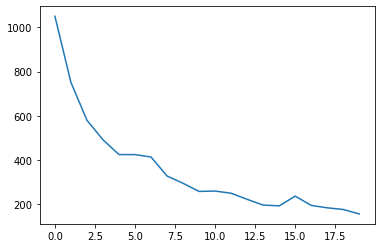

In [6]:
plt.plot(errors)
plt.show()

In [4]:
km=KMeans(n_clusters=7)
cluster_data=km.fit(data)

In [14]:
plot_data=df1.drop(['country'],axis=1)
plot_data['cluster']=cluster_data['cluster']

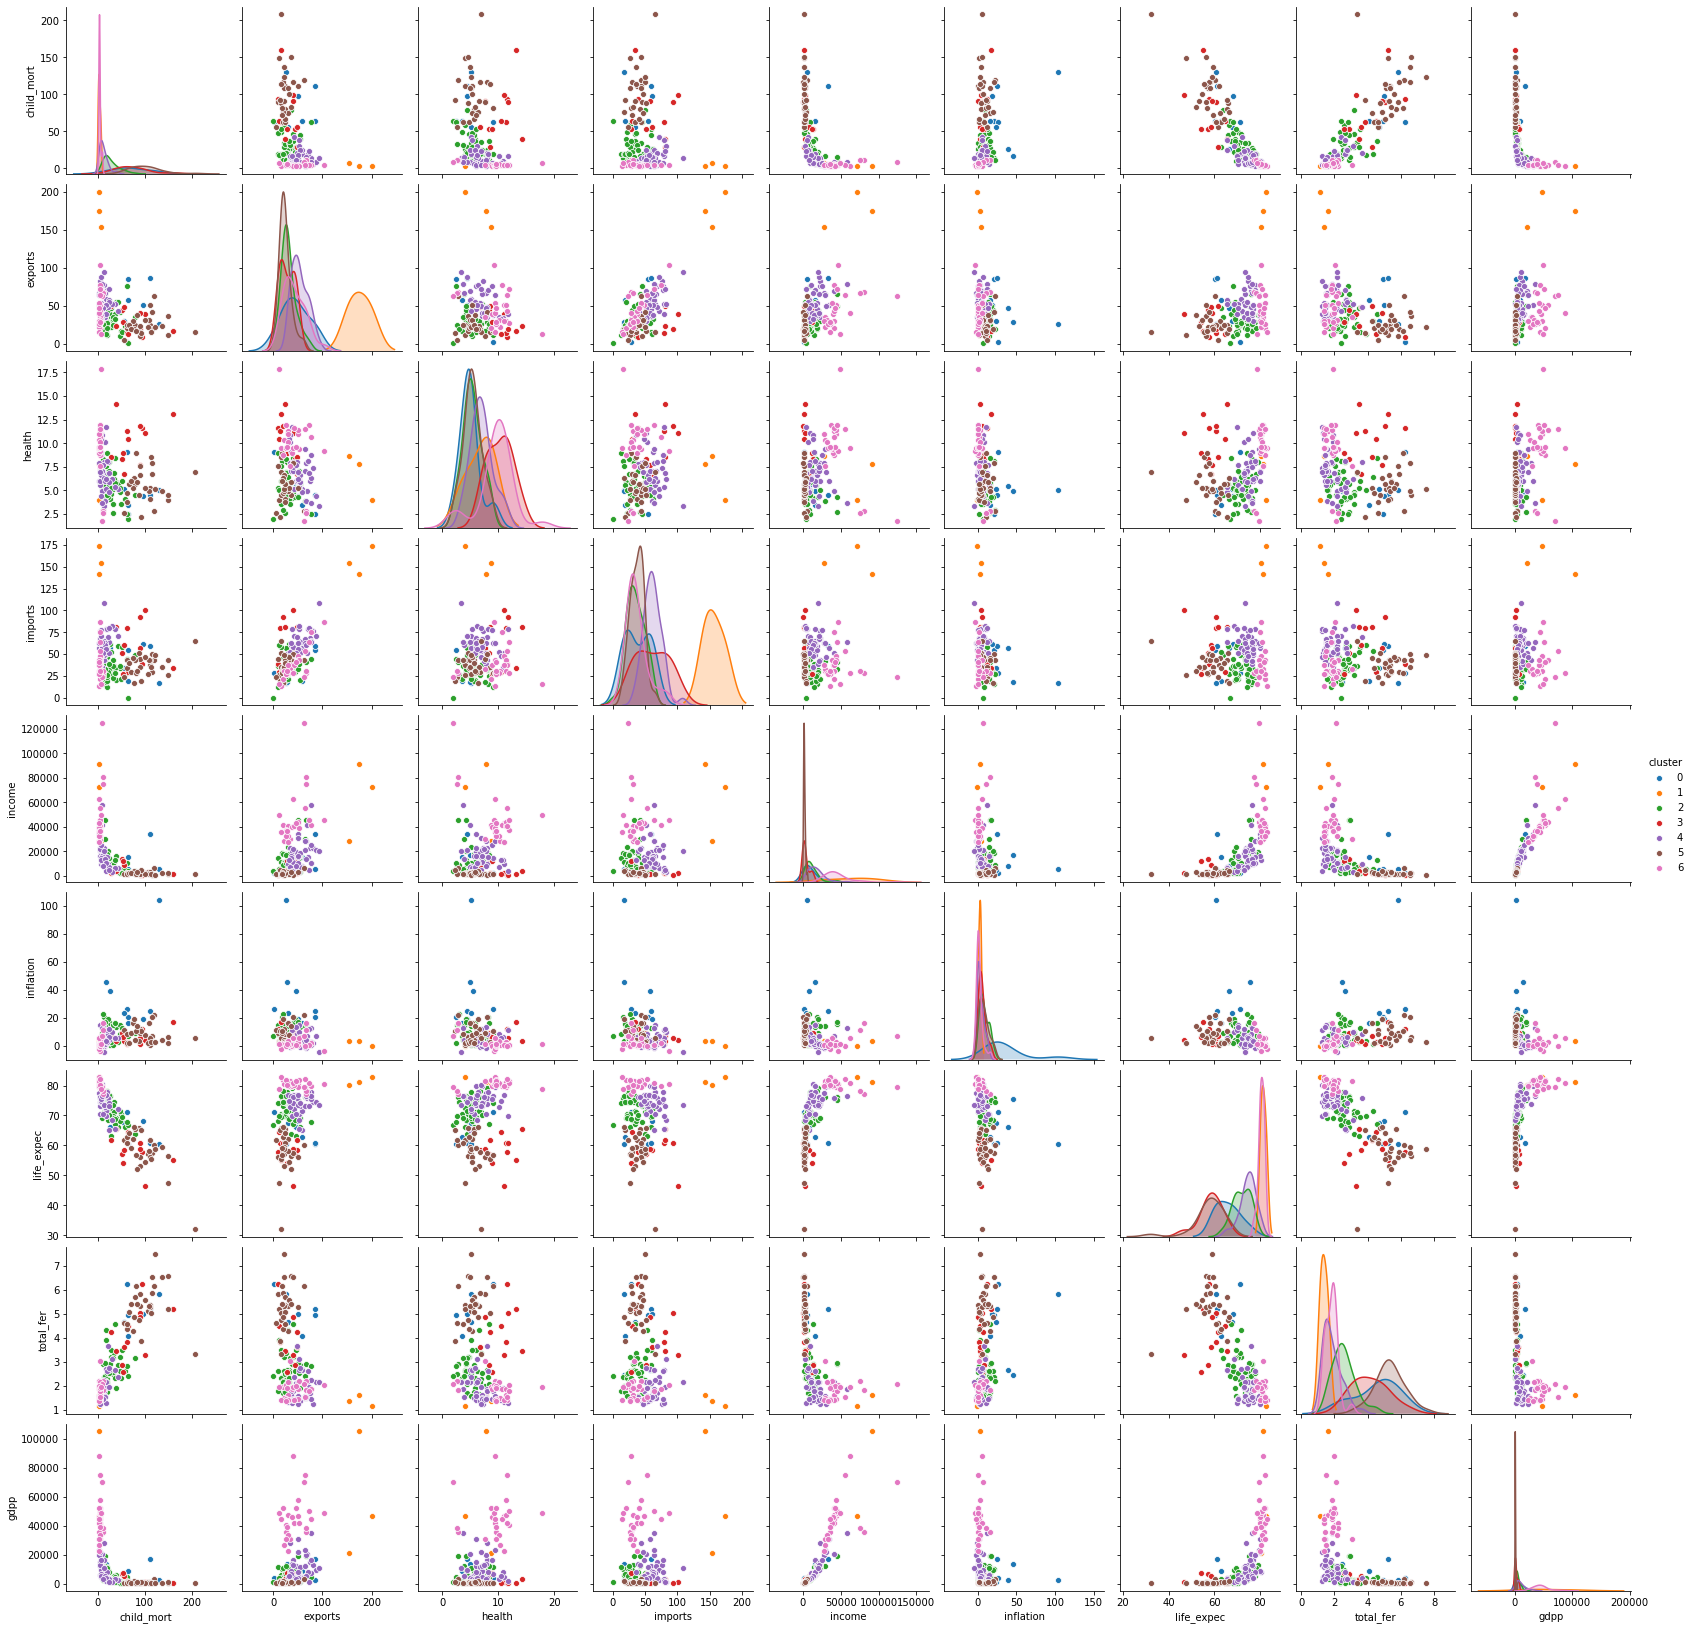

In [6]:
sns.pairplot(plot_data,hue='cluster');

In [7]:
from sklearn.decomposition import PCA

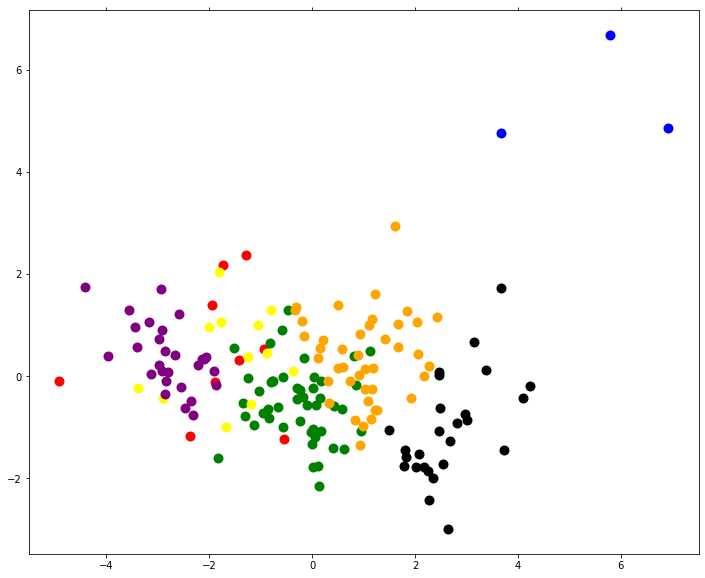

In [8]:
pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame(pca_2d.fit_transform(data.drop(['cluster'], axis=1)))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
x, y = PCs_2d.iloc[:, 0], PCs_2d.iloc[:, 1]
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'black'}
df = pd.DataFrame({'x': x, 'y':y, 'label':data['cluster']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
plt.show()